In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/My Drive/images")
os.getcwd()

'/content/gdrive/My Drive/images'

In [ ]:
!pip install pillow

In [ ]:
try:
    from .pilutil import *
    from . import pilutil
    __all__ += pilutil.__all__
    del pilutil
except ImportError:
    pass

In [ ]:
from __future__ import print_function, division

import numpy as np
import random
import os
import glob
import cv2
import datetime
import pandas as pd
import time
import h5py
import csv

#from scipy.misc import imresize, imsave
#from scipy.misc.pilutil import imread

from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from PIL import Image, ImageChops, ImageOps

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense, BatchNormalization
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# use ImageDataGenerator to preprocess the data
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
path = "/content/gdrive/My Drive/images"
files = os.listdir(path)
categories = []

for filename in files:
    category = filename.split('.')[0]
    if category == 'class0':
        categories.append(1)
    elif category == 'class1':
        categories.append(2)
    elif category == 'class2':
        categories.append(3)
    elif category == 'class3':
        categories.append(4)
    elif category == 'class4':
        categories.append(5)
    else: pass
#df = pd.DataFrame({'filename': files, 'category': categories})
a = {'filename': files,'category': categories}
df = pd.DataFrame.from_dict(a, orient='index')
df.transpose()


,filename,category
0,class1,2
1,class0,1
2,class2,3
3,class4,5
4,class3,4
5,model_weights.h5,None
6,model_architecture.json,None


In [ ]:
import keras df
df['category'].value_counts().plot.bar()


SyntaxError: ignored

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()

total_train = train_df.shape[0] #the number of images in the training df
total_validate = validate_df.shape[0]  #the number of images in the validate df
batch_size=5

In [ ]:
IMAGE_WIDTH=96
IMAGE_HEIGHT=96
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
import keras
import keras.utils
from keras import utils as np_utils

train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory="/content/gdrive/My Drive/images", target_size=(28,28), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dense(5, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=1000,decay=.99),
              metrics=['accuracy'])
model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=50)

In [ ]:
valid_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
valid_generator = valid_datagen.flow_from_directory(directory="/content/gdrive/My Drive/images", target_size=(28,28), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dense(5, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=1000,decay=.99),
              metrics=['accuracy'])
model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=50)

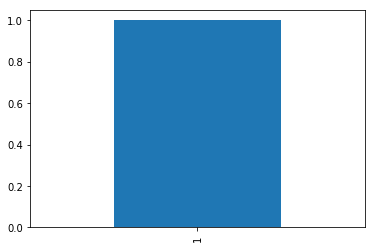

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
earlystop = EarlyStopping(patience=10)

#Learning Rate Reduction

#We will reduce the learning rate when then accuracy is not increasing for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=25,
    validation_data=valid_generator,
    validation_steps=batch_size,
    steps_per_epoch=batch_size,
    callbacks=callbacks
)

Epoch 1/25
5/5 [==============================] - 1s 134ms/step - loss: 12.9230 - acc: 0.1982 - val_loss: 12.8212 - val_acc: 0.2045
Epoch 2/25
5/5 [==============================] - 0s 70ms/step - loss: 12.5361 - acc: 0.2222 - val_loss: 12.9764 - val_acc: 0.1949
Epoch 3/25
5/5 [==============================] - 1s 105ms/step - loss: 12.7669 - acc: 0.2079 - val_loss: 13.0654 - val_acc: 0.1894

Epoch 00003: ReduceLROnPlateau reducing learning rate to 500.0.
Epoch 4/25
5/5 [==============================] - 0s 81ms/step - loss: 13.2242 - acc: 0.1795 - val_loss: 12.7032 - val_acc: 0.2119
Epoch 5/25
5/5 [==============================] - 1s 112ms/step - loss: 12.9102 - acc: 0.1990 - val_loss: 12.9433 - val_acc: 0.1970
Epoch 6/25
5/5 [==============================] - 0s 99ms/step - loss: 13.0760 - acc: 0.1887 - val_loss: 12.8398 - val_acc: 0.2034

Epoch 00006: ReduceLROnPlateau reducing learning rate to 250.0.
Epoch 7/25
5/5 [==============================] - 1s 113ms/step - loss: 12.4405 -

In [ ]:
model.save_weights('model_weights.h5')

# Save the model architecture
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

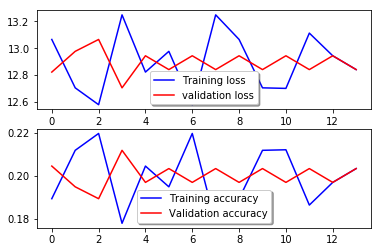

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)